# Assignment: Advanced Regression

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

#### The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Step 1: Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
# Importing Dataset
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Identifying datatypes of the columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Size of the dataset
df.shape

(1460, 81)

In [5]:
# Checking null values in all columns
df.isnull().sum(axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Step 2: Data Cleaning
### 2.1 Treating null values

In [6]:
# Checking for null values present in columns containing numerical data
n1=round(100*df.select_dtypes(include=['int64','float64']).isnull().sum(axis=0)/len(df),2)
n1.sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Id                0.00
OpenPorchSF       0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
EnclosedPorch     0.00
HalfBath          0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
BedroomAbvGr      0.00
FullBath          0.00
MSSubClass        0.00
BsmtFinSF2        0.00
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
BsmtFinSF1        0.00
BsmtUnfSF         0.00
BsmtHalfBath      0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
SalePrice         0.00
dtype: float64

In [7]:
#Cheking for null values present in columns of object type
n2=round(100*df.select_dtypes(include=['object']).isnull().sum(axis=0)/len(df),2)
n2.sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
Electrical        0.07
Functional        0.00
KitchenQual       0.00
CentralAir        0.00
HeatingQC         0.00
Heating           0.00
PavedDrive        0.00
SaleType          0.00
MSZoning          0.00
Street            0.00
Condition2        0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
Foundation        0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
SaleCondition     0.00
dtype: floa

In [8]:
# Storing all feature along with their null percentage in 'n_all'
n_all=round(100*df.isnull().sum(axis=0)/len(df),2)
n_all.sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [9]:
#Extracting columns with missing data more than 50%
n_all=n_all[n_all.values>50]
n_all

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [10]:
n_all.index

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [11]:
df.drop(n_all.index,axis=1,inplace=True)

In [12]:
# Numerical columns containing null values
d1=round(100*df.select_dtypes(['float64','int64']).isnull().sum()/len(df),2).sort_values(ascending=False)
d1=d1[d1>0]
d1

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

In [13]:
d1.index

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

In [14]:
#Categorical columns containing null values
d2=round(100*df.select_dtypes(['object']).isnull().sum()/len(df),2).sort_values(ascending=False)
d2=d2[d2>0]
d2

FireplaceQu     47.26
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtFinType1     2.53
BsmtQual         2.53
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [15]:
d2.index

Index(['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual',
       'MasVnrType', 'Electrical'],
      dtype='object')

In [16]:
# Checking distribution of data in categorical columns
for i in d2.index:
    print(df[i].value_counts(normalize=True,dropna=False)*100)
    print("--------------------------")

NaN    47.260274
Gd     26.027397
TA     21.438356
Fa      2.260274
Ex      1.643836
Po      1.369863
Name: FireplaceQu, dtype: float64
--------------------------
TA     90.821918
NaN     5.547945
Fa      2.397260
Gd      0.616438
Po      0.479452
Ex      0.136986
Name: GarageCond, dtype: float64
--------------------------
TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Ex      0.205479
Po      0.205479
Name: GarageQual, dtype: float64
--------------------------
Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64
--------------------------
Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64
--------------------------
No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64
--------------------------
Unf    86.027397
Rec     3.69

In [17]:
#Replacing NaN with NA(Not available) as per the data dictionary.
#if nan data not defined in dictionary then we will replace with their column's mode
df['GarageCond'].replace(np.nan,'TA',inplace=True)
df['FireplaceQu'].replace(np.nan,'NA',inplace=True)
df['GarageQual'].replace(np.nan,'NA',inplace=True)
df['GarageFinish'].replace(np.nan,'NA',inplace=True)
df['GarageType'].replace(np.nan,'NA',inplace=True)
df['BsmtExposure'].replace(np.nan,'NA',inplace=True)
df['BsmtFinType2'].replace(np.nan,'NA',inplace=True)
df['BsmtCond'].replace(np.nan,'NA',inplace=True)
df['BsmtFinType1'].replace(np.nan,'NA',inplace=True)
df['BsmtQual'].replace(np.nan,'NA',inplace=True)
df['MasVnrType'].replace(np.nan,'None',inplace=True)
df['Electrical'].replace(np.nan,'SBrkr',inplace=True)

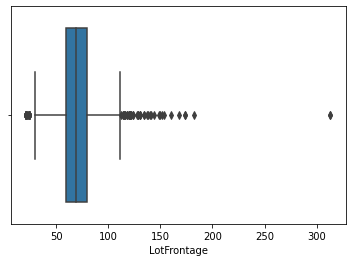

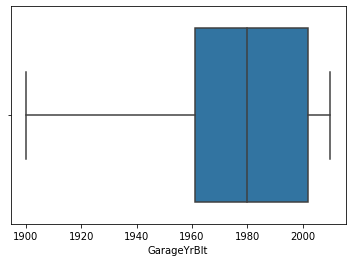

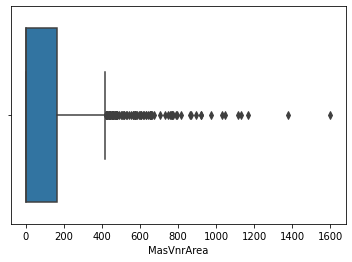

In [18]:
#Plotting box plot of numerical columns containing null 
for i in d1.index:
    sns.boxplot(df[i])
    plt.show()


In [19]:
d1.index

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

In [20]:
# In columns containing numerical data: 
# large amount of outliers: replacing null data with median
# Less amount of outliers: replacing missing values with mode of the respective columns
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [21]:
# Checking if anymore columns(categorical or numericals) contains null data
print(round(100*df.select_dtypes(['object']).isnull().sum()/len(df),2))
#print(round(100*df.select_dtypes(['float64','int64']).isnull().sum()/len(df),2))

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64


In [22]:
# Current shape of the dataframe
df.shape

(1460, 77)

### 2.2 Dealing with skewness

In [23]:
# Storing categorical columns in m
m=df.select_dtypes(include=['object']).columns
m

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
# Storing numerical column names in variable 'n'
n=df.select_dtypes(include=['int64','float64']).columns
n

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
# Checking number of unique data persent in columns of object type
df[m].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [26]:
# Checking number of unique data persent in columns containing numerical data
df[n].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [27]:
# Checking distribution of data in categorical columns
for i in m:
    print(df[i].value_counts(normalize=True,dropna=False)*100)
    print("-------------------------------------------")
    plt.show()

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
-------------------------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
-------------------------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
-------------------------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
-------------------------------------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
-------------------------------------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
-------------------------------------------
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
------------------------------------------

In [28]:
#categorical Columns which are highly skewed having one biased category with more than 80%
l=['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtCond',
  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType']


In [29]:
#Dropping highly skewed categorical column which may affect the regression model
df.drop(l,axis=1,inplace=True)

In [30]:
# Storing updated categorical columns in m
m=df.select_dtypes(include=['object']).columns
m

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [31]:
df.shape

(1460, 59)

In [32]:
# Unique data in numerical columns
u_numeric=df[n].nunique()

In [33]:
# Numerical columns with unique data less than 16
u_numeric=u_numeric[u_numeric<16].index
u_numeric

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold',
       'YrSold'],
      dtype='object')

In [34]:
# Converting the numerical columns which contains unique data less than 16 to cateorical
for i in u_numeric:
    df[i]=df[i].astype('object')

### 2.3 Visualising numerical and categorical columns

-------------------------------------------


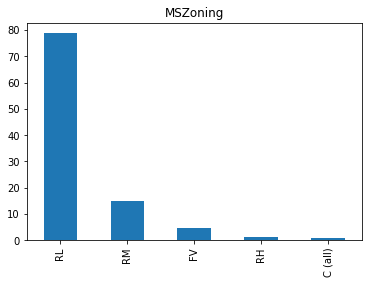

-------------------------------------------


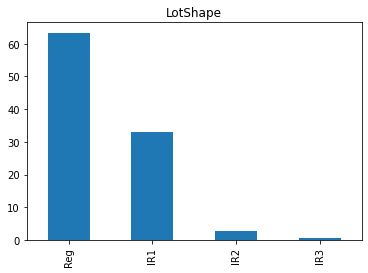

-------------------------------------------


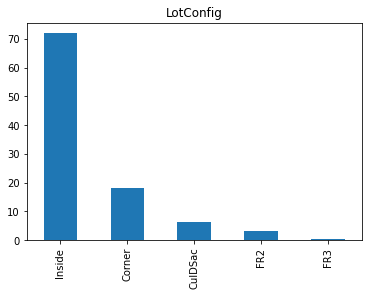

-------------------------------------------


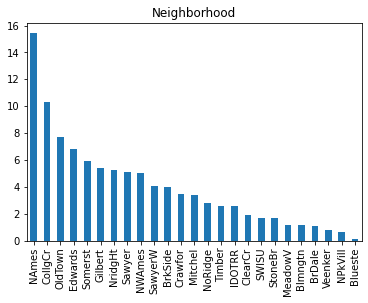

-------------------------------------------


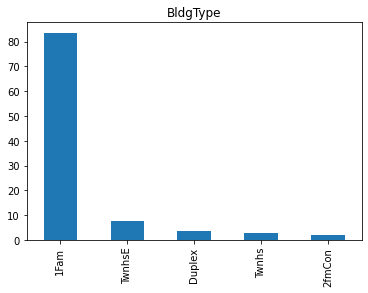

-------------------------------------------


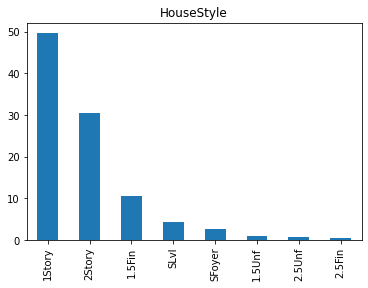

-------------------------------------------


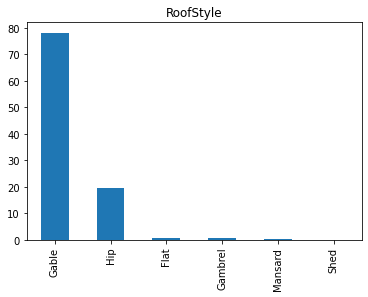

-------------------------------------------


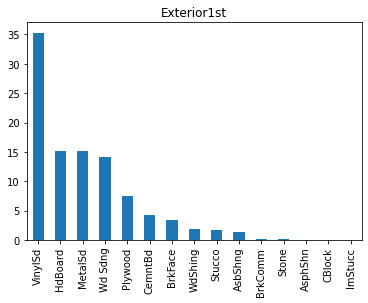

-------------------------------------------


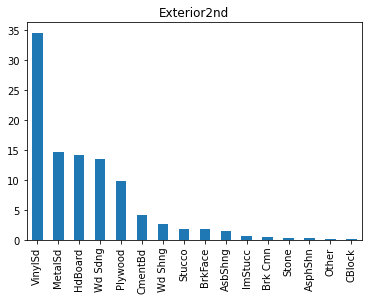

-------------------------------------------


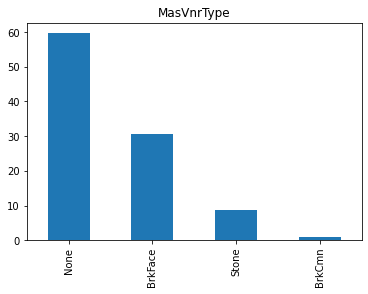

-------------------------------------------


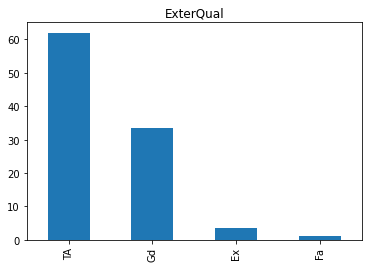

-------------------------------------------


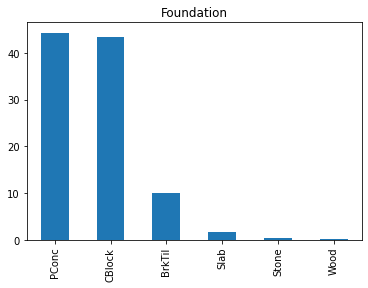

-------------------------------------------


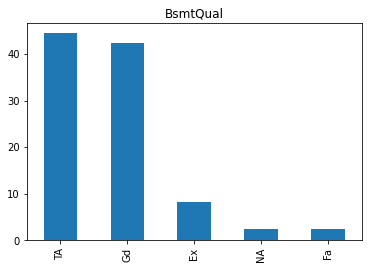

-------------------------------------------


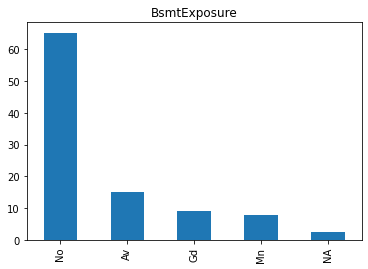

-------------------------------------------


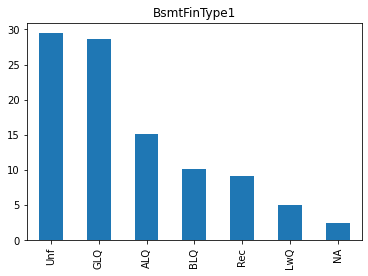

-------------------------------------------


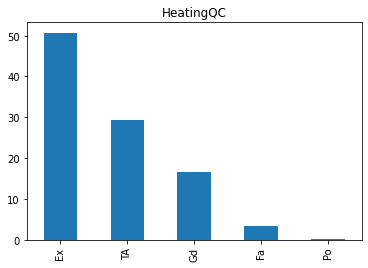

-------------------------------------------


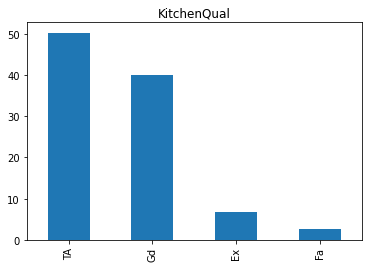

-------------------------------------------


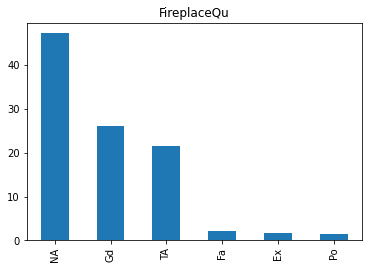

-------------------------------------------


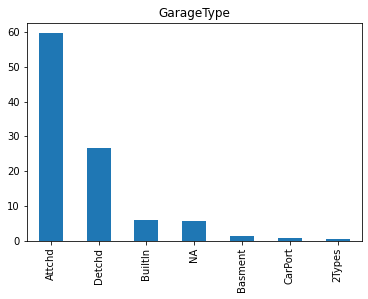

-------------------------------------------


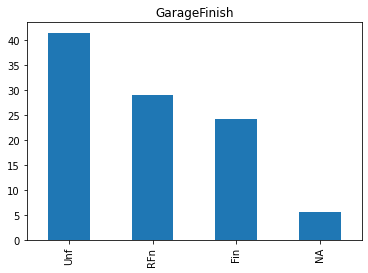

-------------------------------------------


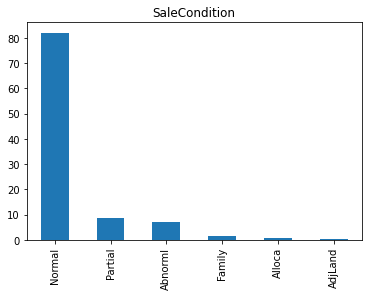

In [35]:
# Plotting Barplot of all the categorical columns to check distribution of data in columns
for i in m:
    plt.title(i)
    (df[i].value_counts(normalize=True,dropna=False)*100).plot.bar()
    print("-------------------------------------------")
    plt.show()  

-------------------------------------


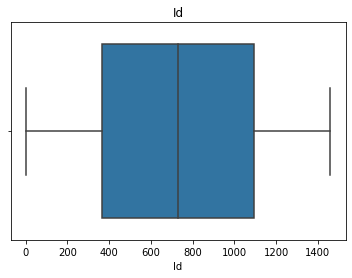

-------------------------------------


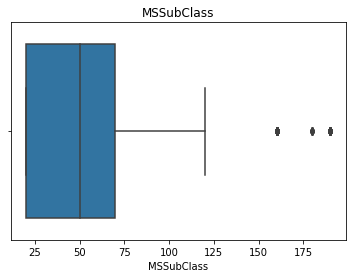

-------------------------------------


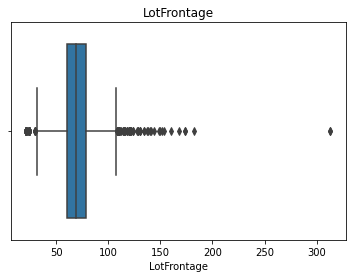

-------------------------------------


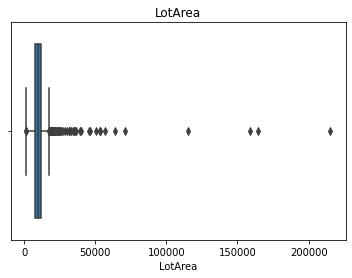

-------------------------------------


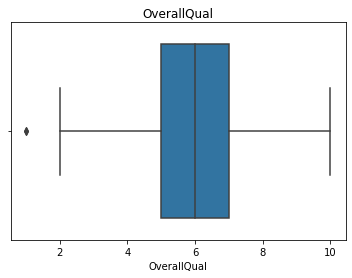

-------------------------------------


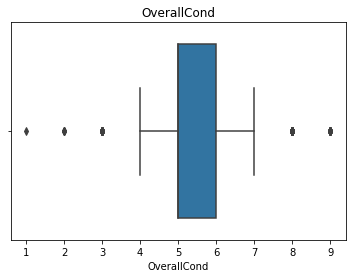

-------------------------------------


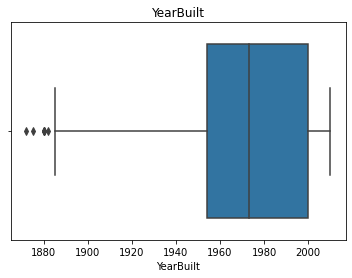

-------------------------------------


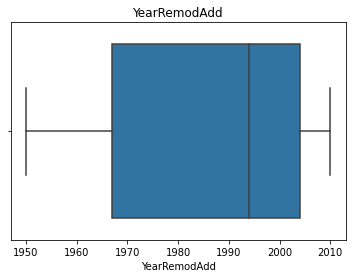

-------------------------------------


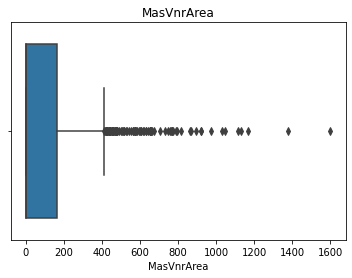

-------------------------------------


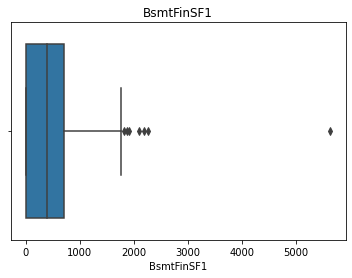

-------------------------------------


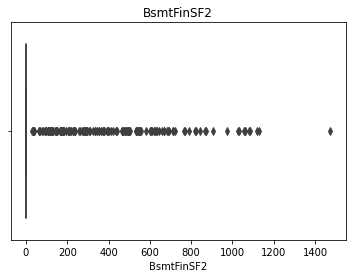

-------------------------------------


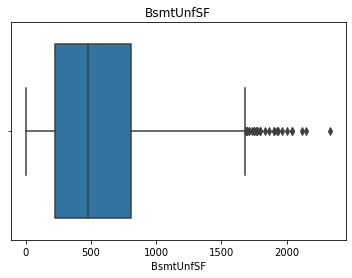

-------------------------------------


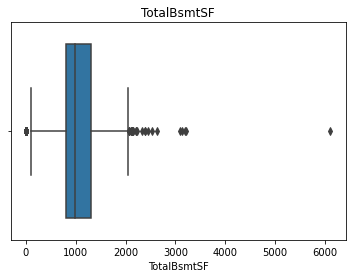

-------------------------------------


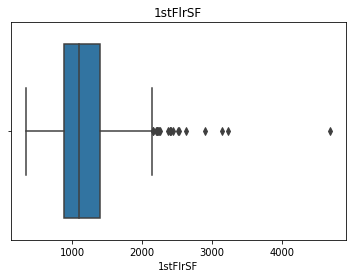

-------------------------------------


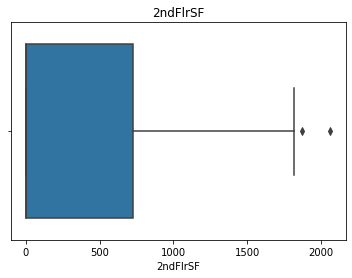

-------------------------------------


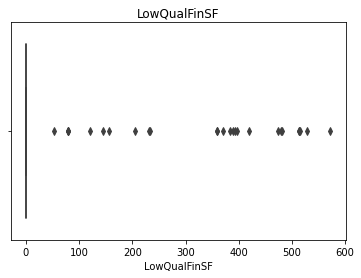

-------------------------------------


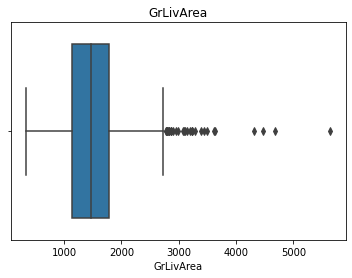

-------------------------------------


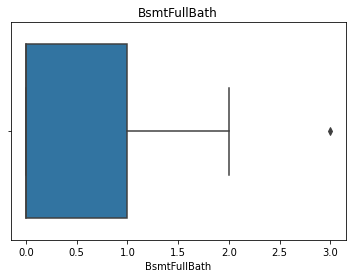

-------------------------------------


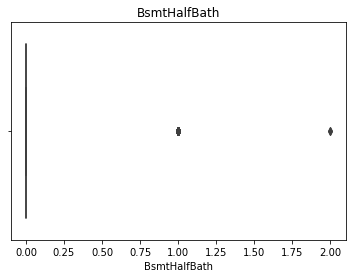

-------------------------------------


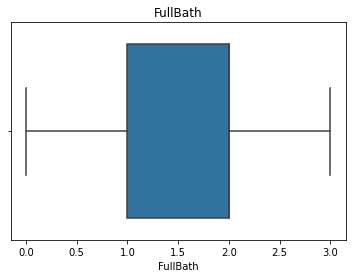

-------------------------------------


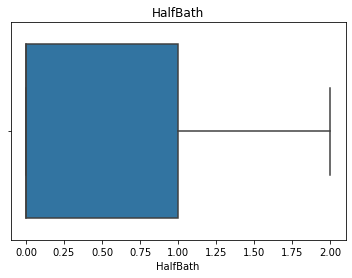

-------------------------------------


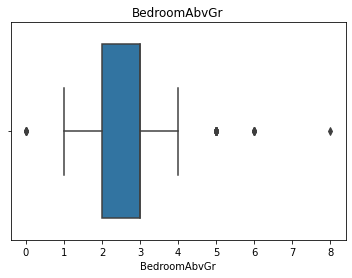

-------------------------------------


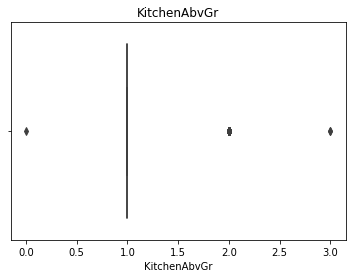

-------------------------------------


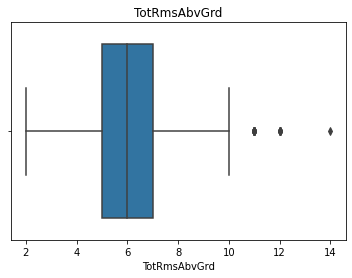

-------------------------------------


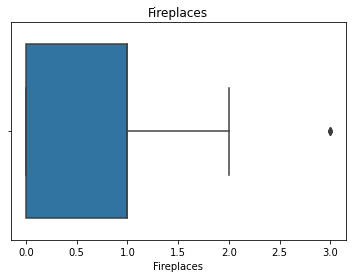

-------------------------------------


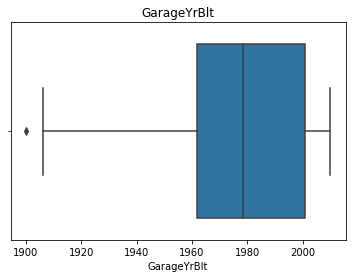

-------------------------------------


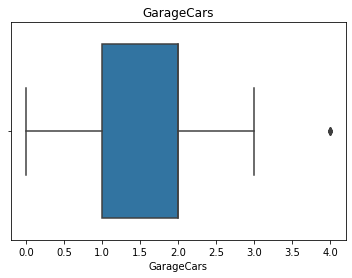

-------------------------------------


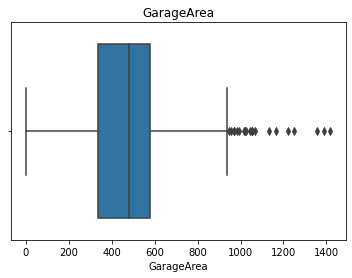

-------------------------------------


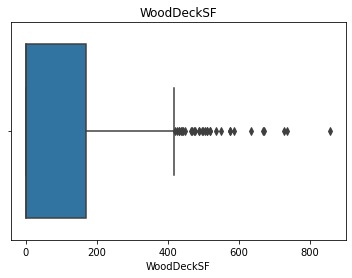

-------------------------------------


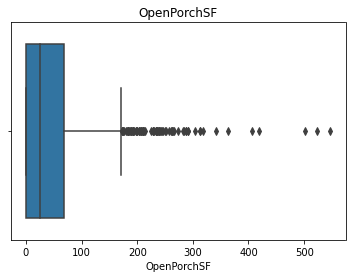

-------------------------------------


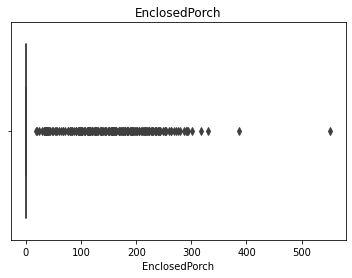

-------------------------------------


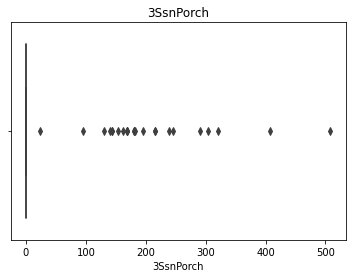

-------------------------------------


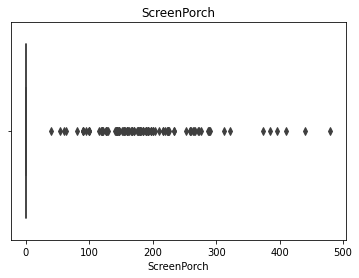

-------------------------------------


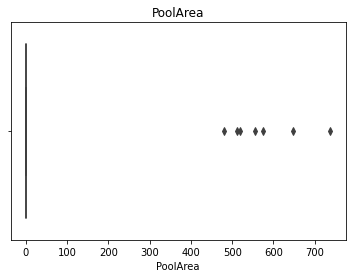

-------------------------------------


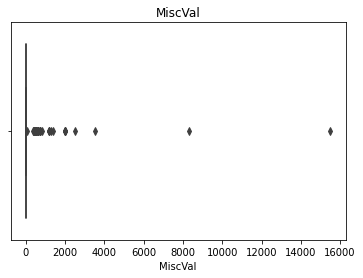

-------------------------------------


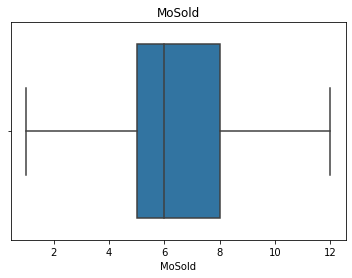

-------------------------------------


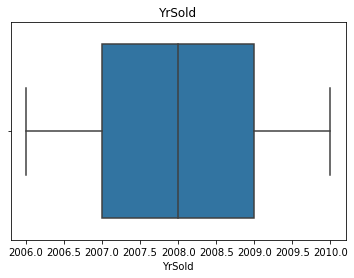

-------------------------------------


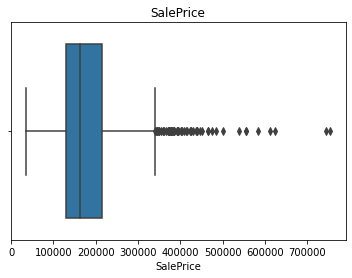

In [36]:
# Plotting boxplot for numerical columns
for i in n:
    plt.title(i)
    sns.boxplot(df[i])
    print("-------------------------------------")
    plt.show() 

In [37]:
# After examining above box plots of numerical columns :
# 'EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF2','MiscVal','PoolArea',
# 'KitchenAbvGr','BsmtHalfBath','LowQualFinSF','LotArea' are found highly skewed. so dropping them
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF2','MiscVal','PoolArea',
         'KitchenAbvGr','BsmtHalfBath','LowQualFinSF','LotArea'],axis=1,inplace=True)

In [38]:
#To check outliers
df.describe(percentiles=[.05,.10,.25,.5,.75,.90,.95,.99])

,Id,LotFrontage,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.506164,472.980137,94.244521,46.660274,180921.195890
std,421.610009,22.027677,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,23.994583,213.804841,125.338794,66.256028,79442.502883
min,1.000000,21.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,34900.000000
5%,73.950000,35.950000,1916.000000,1950.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,848.000000,1930.000000,0.000000,0.000000,0.000000,88000.000000
10%,146.900000,49.000000,1924.900000,1950.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,912.000000,1948.000000,240.000000,0.000000,0.000000,106475.000000
25%,365.750000,60.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1962.000000,334.500000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1978.506164,480.000000,0.000000,25.000000,163000.000000
75%,1095.250000,79.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2001.000000,576.000000,168.000000,68.000000,214000.000000
90%,1314.100000,92.000000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,2006.000000,757.100000,262.000000,130.000000,278000.000000


In [39]:
df.shape

(1460, 49)

In [40]:
# From above summary it is found that these columns have outliers which really need to be treated
outliers=['LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','OpenPorchSF','GrLivArea']

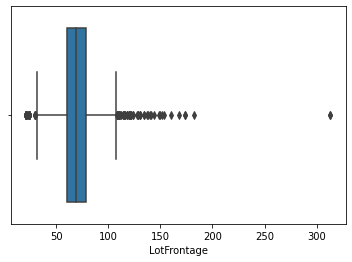

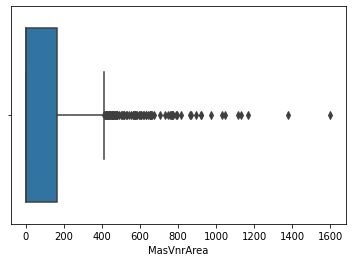

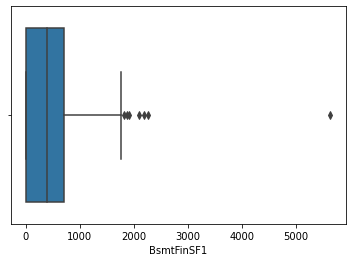

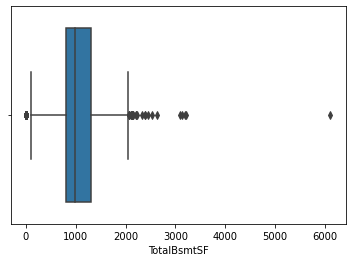

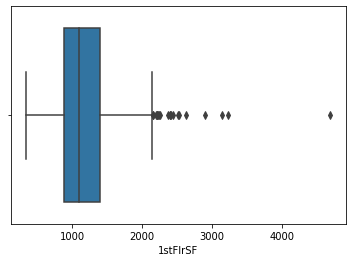

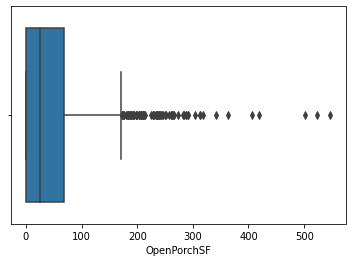

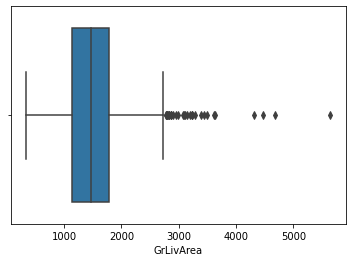

In [41]:
# Plotting boxplot of columns containing outliers
for i in outliers:
    sns.boxplot(df[i])
    plt.show()

In [42]:
# By examining above box plot
out_cap=['MasVnrArea','OpenPorchSF','GrLivArea']
# Capping values beyond 99%
for i in out_cap:
    #df=df[df[i]<df[i].quantile(0.99)]
    df[i] = np.where(df[i] >df[i].quantile(0.99),df[i].quantile(0.99),df[i])

In [43]:
# LotFrontage,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,OpenPorchSF columns containing large amount of outliers
out_remove=['LotFrontage','BsmtFinSF1','TotalBsmtSF','1stFlrSF']
# Removing values beyond 99%
for i in out_remove:
    df=df[df[i]<df[i].quantile(0.99)]
    #df[i] = np.where(df[i] >df[i].quantile(0.99),df[i].quantile(0.99),df[i])

In [44]:
100*df.shape[0]/1460

95.75342465753425

####  95.75% data retained

In [45]:
# Updating categorical column names in m
m=df.select_dtypes(include=['object']).columns
m

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [46]:
# Categorising all the category in categorical columns whose percentage<=4% as 'others'
for i in m:
    s=round(100*df[i].value_counts(normalize=True),2)
    if(len(s[s<=4])>2):
        s=s[s<=4].index
        df[i].replace(s,'others',inplace=True)

In [47]:
for i in m:
    print(round(100*df[i].value_counts(normalize=True),2))
    print("--------------")

20        35.34
60        20.82
others    10.09
50        10.01
120        6.08
30         4.86
160        4.51
70         4.22
80         4.08
Name: MSSubClass, dtype: float64
--------------
RL         78.11
RM         15.45
FV          4.65
RH          1.07
C (all)     0.72
Name: MSZoning, dtype: float64
--------------
Reg    64.38
IR1    32.55
IR2     2.65
IR3     0.43
Name: LotShape, dtype: float64
--------------
Inside     72.39
Corner     17.81
CulDSac     6.15
FR2         3.36
FR3         0.29
Name: LotConfig, dtype: float64
--------------
others     24.61
NAmes      15.38
CollgCr    10.66
OldTown     8.01
Edwards     6.94
Somerst     6.08
Gilbert     5.29
Sawyer      5.29
NWAmes      5.01
NridgHt     4.58
SawyerW     4.08
BrkSide     4.08
Name: Neighborhood, dtype: float64
--------------
1Fam      83.12
others     8.87
TwnhsE     8.01
Name: BldgType, dtype: float64
--------------
1Story    48.57
2Story    31.12
1.5Fin    10.73
others     5.01
SLvl       4.58
Name: HouseStyle, d

In [48]:
#Get all 'year' features
app_flag = df.filter(regex='^[Year,Yr,]',axis=1).columns.tolist()
app_flag

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [49]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LotConfig',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [50]:
# Current Year
import datetime as da
current_year = int(da.datetime.now().year)
current_year

2021

In [51]:
# Age of the house
df['house_age']=current_year-df['YearBuilt']

In [52]:
# Creating a separate column indicationg whether the house is remodelled or not
df['IsRemodelled']=np.where(df['YearBuilt']==df['YearRemodAdd'],0,1)

In [53]:
# Dropping years columns as required info from these columns already aquired and stored in separate columns 
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [54]:
# Dropping month column as 
df.drop('MoSold',axis=1,inplace=True)

In [55]:
df.shape

(1398, 46)

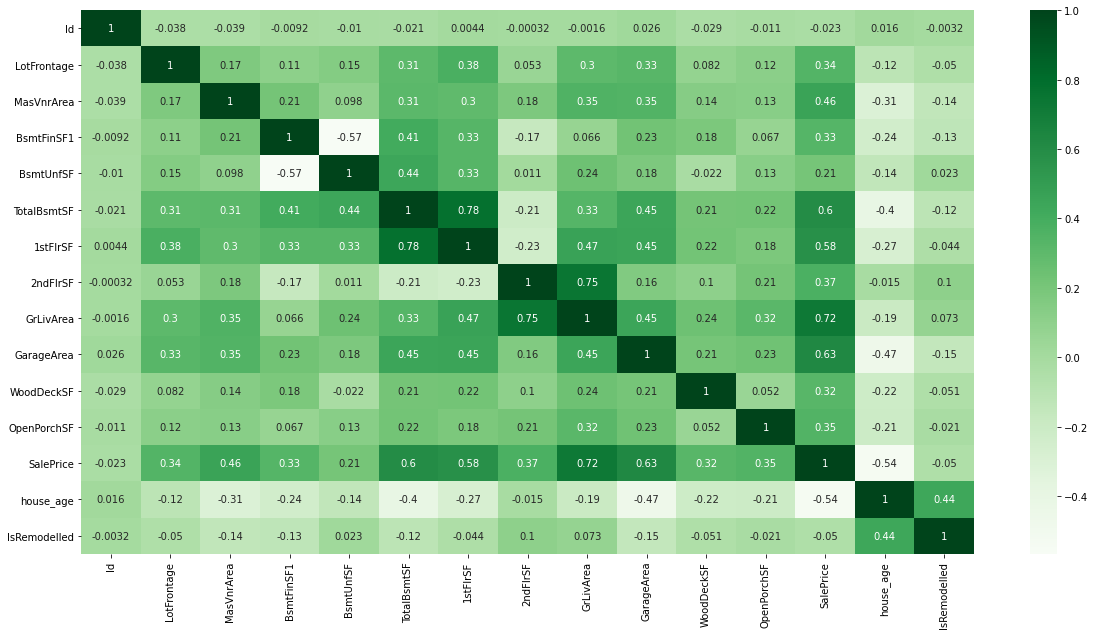

In [56]:
# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

### Inferences:
- Features which are postively correlated with target variable i.e, SalesPrice are :
  - LotFrontage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
  - It means with increase in value of above features, SalesPrice also increases.

- Features which are negatively correlated with target variable i.e, SalesPrice are :
  - house_age and IsRemodelled 
  - It means with increase in value of above features, SalesPrice decreases.

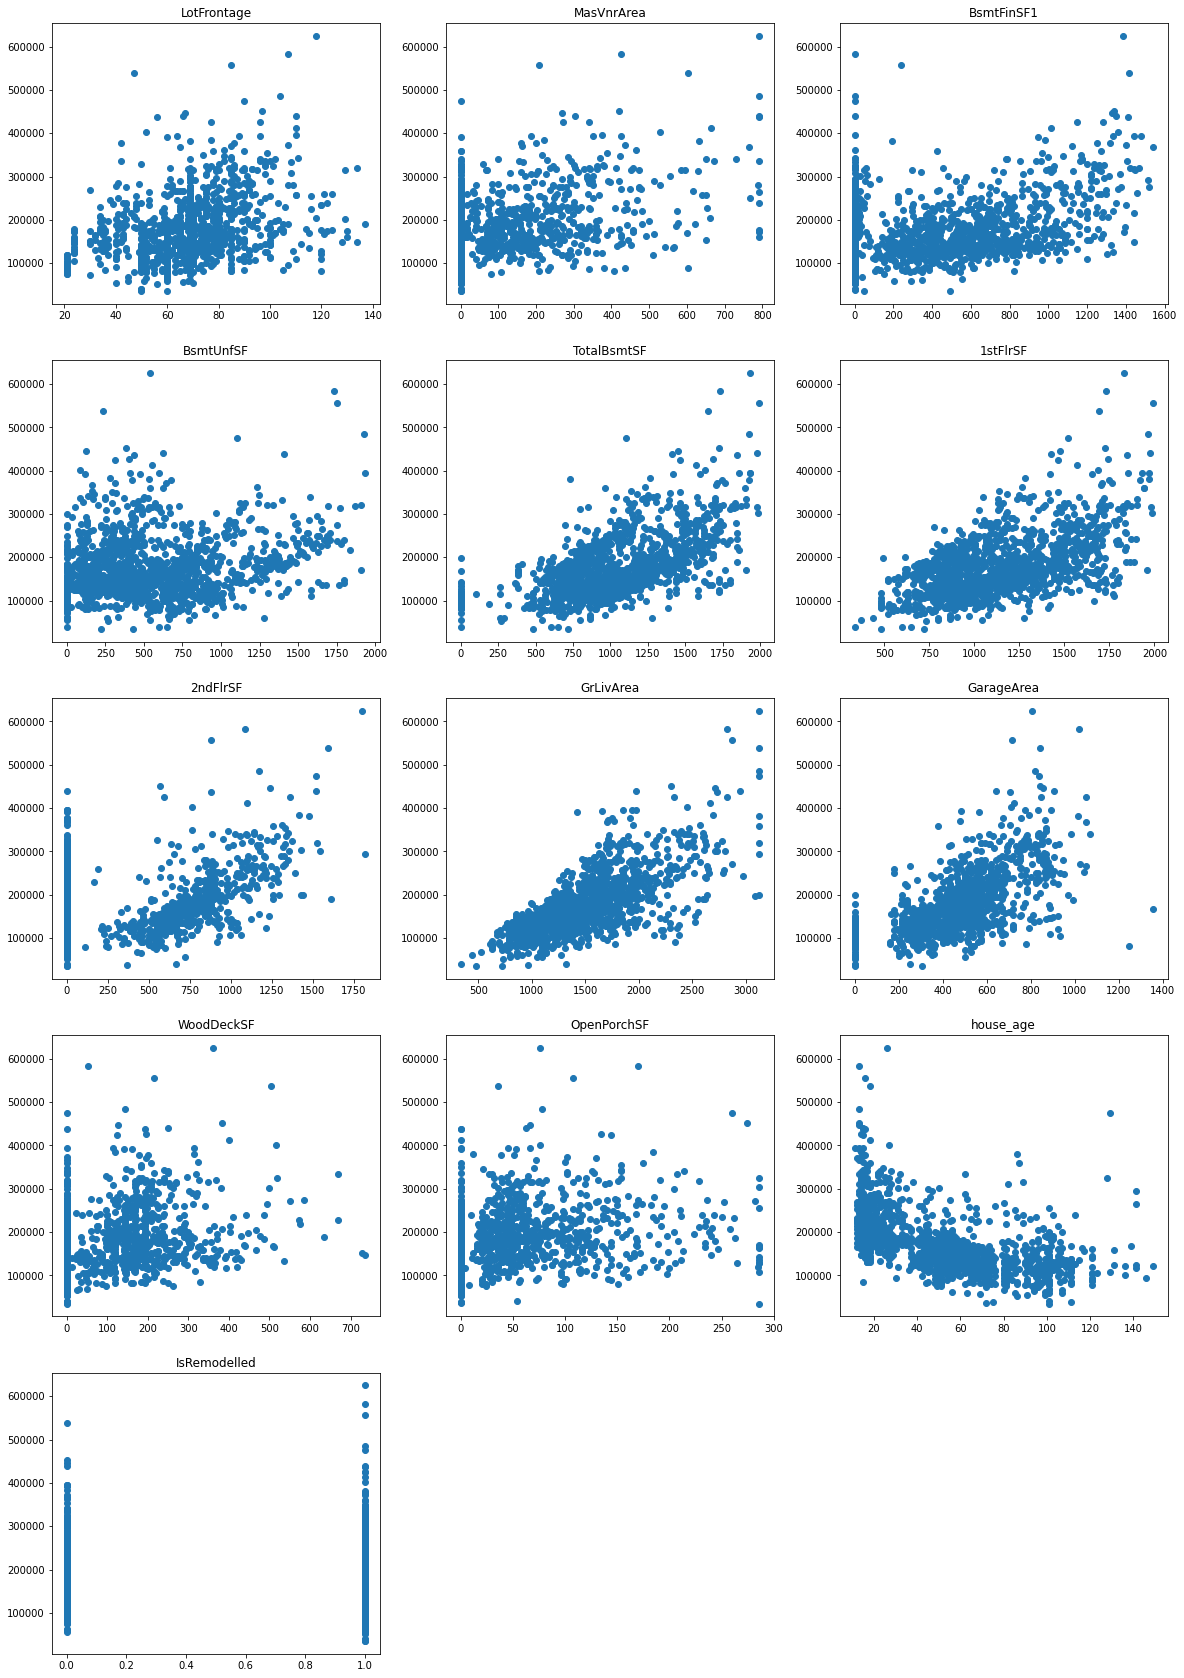

In [57]:
# Plotting some scatterplot to visualise dependency of some independent variables on dependant variable
p=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea',
   'WoodDeckSF','OpenPorchSF','house_age','IsRemodelled']
plt.figure(figsize=(20, 30))
for i in range(len(p)):
    plt.subplot(5,3,i+1)
    plt.title(p[i])
    #plt.xlabel('SalePrice')
    #plt.ylabel(p[i])
    plt.scatter(data=df,x=p[i],y='SalePrice')
    #sns.pairplot(df, x_vars=p[i], y_vars='SalePrice',kind='scatter') # Don't know why subplot is not working with pairplot
plt.show()        

### Inferences:
The above plot clarifies how some features are affecting the sales price of the house either postively or negatively. 
Thus validating the previous inferences which we made by examining heatmap.

In [58]:
#Flattening the correlation matrix to check correlation among independent variables
corr=df.corr()

In [59]:
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [60]:
corr_df=corr.unstack().reset_index()

In [61]:
corr_df.columns=["var1",'var2','correlation']
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df['correlation']=np.abs(corr_df['correlation'].round(2))

In [62]:
corr_df.sort_values('correlation',ascending=False)

,var1,var2,correlation
95,1stFlrSF,TotalBsmtSF,0.78
127,GrLivArea,2ndFlrSF,0.75
188,SalePrice,GrLivArea,0.72
189,SalePrice,GarageArea,0.63
185,SalePrice,TotalBsmtSF,0.60
...,...,...,...
165,OpenPorchSF,Id,0.01
90,1stFlrSF,Id,0.00
210,IsRemodelled,Id,0.00
120,GrLivArea,Id,0.00


### Inference
- 1stFlrSF	TotalBsmtSF shows high correlation of 0.78
- GrLivArea 2ndFlrSF shows high correlation of 0.75
- So dropping 1stFlrSF GrLivArea

In [63]:
df.drop(['1stFlrSF','GrLivArea'],axis=1,inplace=True)

In [64]:
#Flattening the correlation matrix
corr=df.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

corr_df.columns=["var1",'var2','correlation']
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df['correlation']=np.abs(corr_df['correlation'].round(2))

In [65]:
corr_df.sort_values('correlation',ascending=False)

,var1,var2,correlation
137,SalePrice,GarageArea,0.63
135,SalePrice,TotalBsmtSF,0.60
55,BsmtUnfSF,BsmtFinSF1,0.57
153,house_age,SalePrice,0.54
150,house_age,GarageArea,0.47
...,...,...,...
52,BsmtUnfSF,Id,0.01
39,BsmtFinSF1,Id,0.01
117,OpenPorchSF,Id,0.01
156,IsRemodelled,Id,0.00


In [66]:
df.shape

(1398, 44)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

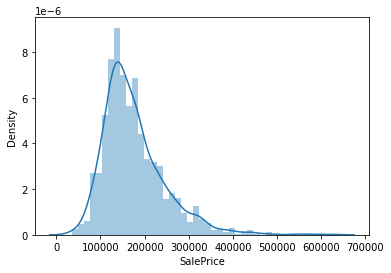

In [67]:
# Checking the skewness in the target variable
sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

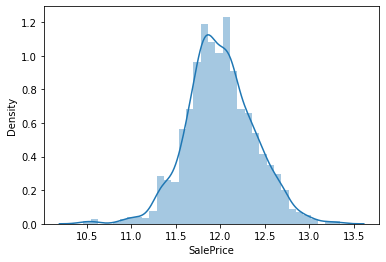

In [68]:
# Doing Log Tranformation to reduce skewness and make it normalized for model building
df['SalePrice']=np.log(df['SalePrice'])
sns.distplot(df['SalePrice'])

## Step 3: Data Preparation 

Let's now prepare the data and build the model.

In [69]:
# split into X and y
X = df.drop('SalePrice',axis=1)

y = df['SalePrice'] # response variable in Y

In [70]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,SaleCondition
0,60,RL,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,8,0,NA,Attchd,RFn,2,Normal
1,20,RL,Reg,FR2,others,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,Normal
2,60,RL,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,Normal
3,70,RL,IR1,Corner,others,1Fam,2Story,7,5,Gable,Wd Sdng,others,None,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,Abnorml
4,60,RL,IR1,FR2,others,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,Normal


In [71]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_160,MSSubClass_others,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_others,BldgType_TwnhsE,BldgType_others,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_others,RoofStyle_Hip,RoofStyle_others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_others,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_NA,FireplaceQu_TA,FireplaceQu_others,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_others
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [72]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [73]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [74]:
X.head()

,Id,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,house_age,IsRemodelled,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_160,MSSubClass_others,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_others,BldgType_TwnhsE,BldgType_others,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_others,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_others,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_others,RoofStyle_Hip,RoofStyle_others,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_others,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_others,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_others,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_others,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_others,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_NA,FireplaceQu_TA,FireplaceQu_others,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_others
0,1,65.0,196.0,706,150,856,854,548,0,61.0,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2,80.0,0.0,978,284,1262,0,460,298,0.0,45,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,3,68.0,162.0,486,434,920,866,608,0,42.0,20,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,4,60.0,0.0,216,540,756,756,642,0,35.0,106,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,5,84.0,350.0,655,490,1145,1053,836,192,84.0,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [75]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
#Since after using scale function to scale the data, df is converted to numpy array and column name get lost
#Thats why using cols to store column names which will be later used to assign column names to scaled data
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_others'],
      dtype='object', length=137)

In [76]:
# split into train and test
np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

## Step 4: Model Building and Evaluation
### 4.1 Recursive feature elimination (RFE)
- There are total 137 columns in the df.So, using RFE to get best 50 feature out of 137 for model building.

In [77]:
# Importing libraries for further analysis of the dataframe
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [78]:
#Intantiating LM
lm=LinearRegression()

#Fitting a line
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm,50)            
rfe = rfe.fit(X_train, y_train)

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 81),
 ('LotFrontage', True, 1),
 ('MasVnrArea', False, 63),
 ('BsmtFinSF1', False, 6),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 64),
 ('house_age', True, 1),
 ('IsRemodelled', False, 58),
 ('MSSubClass_30', False, 13),
 ('MSSubClass_50', False, 33),
 ('MSSubClass_60', False, 46),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_120', False, 60),
 ('MSSubClass_160', False, 47),
 ('MSSubClass_others', False, 55),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 44),
 ('LotShape_IR3', False, 68),
 ('LotShape_Reg', False, 71),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', False, 77),
 ('LotConfig_FR3', False, 79),
 ('LotConfig_Inside', False, 76),
 ('Neighborhood_CollgCr', False, 21),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', False, 26

In [80]:
#Selected columns by RFE(Recursive Feature Elimination)
col=X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GarageArea',
       'WoodDeckSF', 'house_age', 'MSSubClass_70', 'MSSubClass_80',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'Neighborhood_Edwards', 'HouseStyle_2Story',
       'HouseStyle_SLvl', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_others',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtQual_NA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'BsmtFinType1_NA',
       'FullBath_2', 'FullBath_3', 'HalfBath_1', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Fireplaces_1', 'Fireplaces_2',
       'Fireplaces_3', 'FireplaceQu_NA', 'GarageType_NA', 'GarageFinish_NA',
       'GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [81]:
#Eliminated columns by RFE(Recursive Feature Elimination)
X_train.columns[~rfe.support_]

Index(['Id', 'MasVnrArea', 'BsmtFinSF1', 'OpenPorchSF', 'IsRemodelled',
       'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_others', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_others', 'BldgType_TwnhsE', 'BldgType_others',
       'HouseStyle_1Story', 'HouseStyle_others', 'OverallQual_5',
       'OverallQual_others', 'RoofStyle_Hip', 'RoofStyle_others',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_others',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exteri

In [82]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train[col]
X_test =  X_test[col]

In [83]:
X_train.shape

(978, 50)

In [84]:
# Performing Linear Regression on top 50 columns
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [85]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.998833366875377
[ 3.04981099e-02 -2.90999552e-02  1.45476074e-01  1.30631825e-01
  2.70935372e-02  1.46263893e-02 -5.73519019e-02  3.28164689e-02
 -2.14331270e-02  8.57255705e-02  3.95389442e-02  1.51363703e-01
  1.06218064e-01  1.77395577e-02 -1.75034464e-02 -5.01529620e-02
  2.55733506e-02  1.82752333e-02  3.52755835e-02  4.42394035e-02
  2.16918502e-02  4.28931741e-02  2.82152467e-02 -1.61946744e-02
 -2.61950692e-02 -5.85459239e-02 -7.00427806e-02  2.90243042e-02
 -2.24911020e+08  1.76411471e-02  1.42906775e-02  2.24911020e+08
  1.76344074e-02  2.45309534e-02  2.21376963e-02 -3.20510294e-02
 -6.34530439e-02 -7.93068303e-02 -2.94833687e+09 -1.50959136e+09
 -2.74904987e+08 -2.96969634e+09  1.10708204e+09 -9.37031651e+07
  1.93444672e+09  2.17487752e+09  1.37014425e+09  2.61997087e+08
  3.13392743e-02  3.67121108e-02]


In [86]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9035733344877565
0.8621179909191053
13.62320747012619
8.317885666270854
0.01392965998990408
0.019804489681597273


### 4.2 Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### 4.2.1 Ridge Regression

In [87]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [89]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03053718 -0.0283587   0.14396835  0.12707682  0.02731929  0.01470975
 -0.05654207  0.03257393 -0.02006437  0.0747143   0.03438724  0.13035168
  0.08794161  0.01771908 -0.0171569  -0.04786971  0.02419256  0.01770393
  0.03464738  0.0437117   0.02129601  0.04266753  0.02801153 -0.01657711
 -0.0262379  -0.0549971  -0.06667912  0.02898717  0.01514214  0.01782066
  0.01515202  0.01514214  0.01844519  0.02537393  0.02290123 -0.03164164
 -0.06163161 -0.07741568  0.01034259  0.01709365  0.00779781 -0.0196793
 -0.00720071 -0.00720071 -0.0075107   0.00395313  0.00875149  0.0047242
  0.03233067  0.03748542]


In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9034273731448869
0.8613381237078713
13.643828961556675
8.3649320238135
0.013950745359464903
0.019916504818603572


### 4.2.2 Lasso Regression

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [93]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [94]:
lasso.coef_

array([ 3.03133417e-02, -2.87858033e-02,  1.45382482e-01,  1.29816447e-01,
        2.75773673e-02,  1.45277692e-02, -5.71848376e-02,  3.26100559e-02,
       -1.94927243e-02,  8.21662904e-02,  3.77962658e-02,  1.44660753e-01,
        1.00362901e-01,  1.76497686e-02, -1.72923417e-02, -4.90562048e-02,
        2.37683881e-02,  1.78822674e-02,  3.47429327e-02,  4.37649933e-02,
        2.13603030e-02,  4.26139444e-02,  2.80273686e-02, -1.63351041e-02,
       -2.59606537e-02, -5.64234782e-02, -6.79955606e-02,  2.88855375e-02,
        2.83768001e-02,  1.77187919e-02,  1.45668278e-02,  2.29355800e-03,
        1.75739611e-02,  2.46196351e-02,  2.20864828e-02, -3.18486257e-02,
       -6.25986143e-02, -7.86109279e-02,  0.00000000e+00,  1.14486269e-02,
        6.78354631e-03, -2.97604494e-02, -1.58664649e-02, -2.20671162e-16,
       -1.10059980e-02,  0.00000000e+00,  5.56470474e-03,  3.97226846e-03,
        3.14772208e-02,  3.68521401e-02])

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9035506526201853
0.8620553919180405
13.626411975706565
8.321662020685405
0.01393293658047706
0.019813481001631918


In [96]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'],
            'Linear Regression': metric,
            'Ridge Regression': metric1,
            'Lasso Regression': metric2
           }

lr_metric = pd.DataFrame(lr_table)
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.903573,0.903427,0.903551
1,R2 Score (Test),0.862118,0.861338,0.862055
2,RSS (Train),13.623207,13.643829,13.626412
3,RSS (Test),8.317886,8.364932,8.321662
4,RMSE (Train),0.118024,0.118113,0.118038
5,RMSE (Test),0.140728,0.141126,0.140760


### 4.3 Lets observe the changes in the coefficients after regularization

In [97]:
betas = pd.DataFrame(index=col)

In [98]:
betas.rows = col

In [99]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [100]:
# Displaying coefficients of each feature predicted by Linear, Ridge and Lasso Regression:
# Arranging the columns as per the co-efficients perdicted by Lasso Regression
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
TotalBsmtSF,1.454761e-01,0.143968,1.453825e-01
MSZoning_RL,1.513637e-01,0.130352,1.446608e-01
2ndFlrSF,1.306318e-01,0.127077,1.298164e-01
MSZoning_RM,1.062181e-01,0.087942,1.003629e-01
MSZoning_FV,8.572557e-02,0.074714,8.216629e-02
OverallQual_8,4.423940e-02,0.043712,4.376499e-02
OverallCond_7,4.289317e-02,0.042668,4.261394e-02
MSZoning_RH,3.953894e-02,0.034387,3.779627e-02
SaleCondition_Partial,3.671211e-02,0.037485,3.685214e-02
OverallQual_7,3.527558e-02,0.034647,3.474293e-02


In [101]:
betas.shape

(50, 3)

### Inferences:
    
- Optimal value of alpha for ridge and lasso regression:
  - Ridge: 3
  - Lasso: 0.0001
    
#### Top 10 features identified as per Lasso Regression which are significant in predicting the price of a house. 
     
1. TotalBsmtSF : Total square feet of basement area
2. MSZoning_RL : Zoning-Residential Low Density
3. 2ndFlrSF : Second floor square feet
4. MSZoning_RM : Zoning-Residential Medium Density
5. MSZoning_FV : Zoning-Floating Village Residential
6. OverallQual_8 : Very Good overall material and finish of the house 
7. OverallCond_7 : Good overall condition of the house
8. MSZoning_RH : Zoning-Residential High Density
9. SaleCondition_Partial : Home was not completed when last assessed (associated with New Homes)
10. OverallQual_7 : Good overall material and finish of the house

- As the above variables co-efficient are positive.
- Then better these variables/features are, more will be the price of the house.

#### Metrics Observed: 
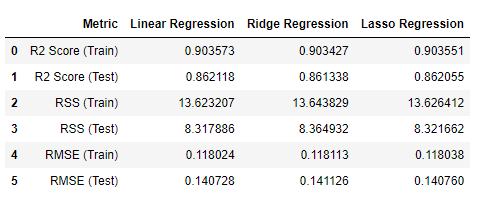
    


- We can see both feature coefficient and other matrices(R2 score, RSS, RMSE) are almost similar in both Ridge and Lasso Regression. 
- And in broad-perpective we know that Lasso Regression penalizes the co-efficient to zero 
which tends to cause overfitting . By keeping this scenario in mind, its better go with Lasso Regression for final model.

# Assignment Part II

### 4.4 Doubling the optimal lambda/alpha value for both ridge and Lasso regression

### 4.4.1 Ridge Regression

In [102]:

#Fitting Ridge model for alpha = 3*2 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03057262 -0.02765343  0.1424753   0.12379223  0.02752744  0.01478584
 -0.05565661  0.03228706 -0.01882373  0.06656352  0.03057434  0.11485243
  0.07444108  0.01769829 -0.01688183 -0.04575755  0.0229331   0.01718448
  0.03405779  0.04323495  0.02091678  0.04242111  0.0277862  -0.01690564
 -0.02619579 -0.05191744 -0.06382942  0.0289399   0.01485526  0.01797713
  0.01595723  0.01485526  0.01917605  0.02611541  0.02355164 -0.03119541
 -0.05983832 -0.07555471  0.01051898  0.0175238   0.00779277 -0.0200726
 -0.00734517 -0.00734517 -0.00750119  0.00369856  0.00923022  0.00482242
  0.03297932  0.03801498]


In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.9031071525290422
0.8605312542696556
13.689069890118176
8.413607320753428
0.013997003977625948
0.020032398382746258


### 4.4.2 Lasso Regression

In [104]:
#Fitting Lasso model for alpha = 0.0001*2 and printing coefficients which have been penalised

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [105]:
lasso.coef_

array([ 3.01284518e-02, -2.84725377e-02,  1.45290982e-01,  1.29001987e-01,
        2.80611484e-02,  1.44285920e-02, -5.70177165e-02,  3.24061466e-02,
       -1.75507699e-02,  7.85827270e-02,  3.60423330e-02,  1.37915052e-01,
        9.44720227e-02,  1.75601319e-02, -1.70813438e-02, -4.79602354e-02,
        2.19621835e-02,  1.74892720e-02,  3.42114628e-02,  4.32906526e-02,
        2.10280917e-02,  4.23344827e-02,  2.78386702e-02, -1.64756959e-02,
       -2.57283745e-02, -5.43013943e-02, -6.59478825e-02,  2.87462994e-02,
        2.81939939e-02,  1.77980241e-02,  1.48438869e-02,  2.32535667e-03,
        1.75141502e-02,  2.47097702e-02,  2.20355295e-02, -3.16463457e-02,
       -6.17461498e-02, -7.79166908e-02,  0.00000000e+00,  1.14766539e-02,
        6.70481264e-03, -3.00448817e-02, -1.56523229e-02, -2.43206580e-18,
       -1.06682164e-02,  0.00000000e+00,  5.54125443e-03,  3.84667820e-03,
        3.16170235e-02,  3.69936406e-02])

In [106]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.903482312655693
0.8619348606561357
13.63606708002688
8.32893320321617
0.013942808875283109
0.01983079334099088


In [107]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'],
            'Linear Regression': metric,
           'Ridge Regression': metric1,
            'Lasso Regression': metric2
           }

lr_metric = pd.DataFrame(lr_table)
lr_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.903573,0.903107,0.903482
1,R2 Score (Test),0.862118,0.860531,0.861935
2,RSS (Train),13.623207,13.689070,13.636067
3,RSS (Test),8.317886,8.413607,8.328933
4,RMSE (Train),0.118024,0.118309,0.118080
5,RMSE (Test),0.140728,0.141536,0.140822


In [108]:
betas = pd.DataFrame(index=col)
betas.rows = col

In [109]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [110]:
# Displaying coefficients of each feature predicted by Linear, Ridge and Lasso Regression:
# Arranging the columns as per the co-efficients perdicted by Lasso Regression
pd.set_option('display.max_rows', None)
betas.sort_values('Lasso',ascending=False)

,Linear,Ridge,Lasso
TotalBsmtSF,1.454761e-01,0.142475,1.452910e-01
MSZoning_RL,1.513637e-01,0.114852,1.379151e-01
2ndFlrSF,1.306318e-01,0.123792,1.290020e-01
MSZoning_RM,1.062181e-01,0.074441,9.447202e-02
MSZoning_FV,8.572557e-02,0.066564,7.858273e-02
OverallQual_8,4.423940e-02,0.043235,4.329065e-02
OverallCond_7,4.289317e-02,0.042421,4.233448e-02
SaleCondition_Partial,3.671211e-02,0.038015,3.699364e-02
MSZoning_RH,3.953894e-02,0.030574,3.604233e-02
OverallQual_7,3.527558e-02,0.034058,3.421146e-02


### Inferences:
    
- Doubling alpha value of ridge and lasso regression:
  - Ridge: 6
  - Lasso: 0.0002
    
#### Top 10 features identified as per Lasso Regression:
    
1. TotalBsmtSF : Total square feet of basement area
2. MSZoning_RL : Zoning-Residential Low Density
3. 2ndFlrSF : Second floor square feet
4. MSZoning_RM : Zoning-Residential Medium Density
5. MSZoning_FV : Zoning-Floating Village Residential
6. OverallQual_8 : Very Good overall material and finish of the house 
7. OverallCond_7 : Good overall condition of the house
8. SaleCondition_Partial : Home was not completed when last assessed (associated with New Homes)
9. MSZoning_RH : Zoning-Residential High Density
10. OverallQual_7 : Good overall material and finish of the house
    
### Metrics before doubling alpha/lambda:

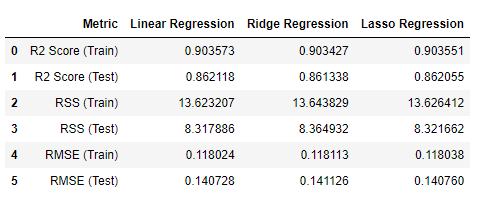


    


### Metrics after doubling alpha/lambda:

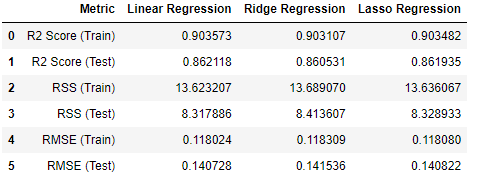

- R2 score for both train and test data decreases slighlty.
- RSS and RMSE for both train and test data increases slightly


### 4.5 Removing the top 5 contributors 

- Top 5 features when optimal value of alpha/lambda value in Lasso regression is 0.0001 
- 2ndFlrSF,TotalBsmtSF,MSZoning_RL,MSZoning_RM,MSZoning_FV

In [111]:
# Dropping them as per question number 3
X_train=X_train.drop(['2ndFlrSF','TotalBsmtSF','MSZoning_RL','MSZoning_RM','MSZoning_FV'],axis=1)
X_test=X_test.drop(['2ndFlrSF','TotalBsmtSF','MSZoning_RL','MSZoning_RM','MSZoning_FV'],axis=1)

In [112]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [114]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [115]:
len(lasso.coef_)

45

In [116]:
lasso_list = pd.DataFrame({'Features':X_train.columns})
lasso_list['co-efficients']=lasso.coef_
lasso_list.sort_values('co-efficients',ascending=False).head(10)

,Features,co-efficients
27,FullBath_2,0.063073
0,LotFrontage,0.057224
2,GarageArea,0.054474
28,FullBath_3,0.054139
14,OverallQual_8,0.052039
29,HalfBath_1,0.048843
25,BsmtFinType1_GLQ,0.039921
16,OverallCond_7,0.037719
13,OverallQual_7,0.036848
44,SaleCondition_Partial,0.036498


### Inferences: 
- After dropping previous top 5 features and rebuilding the model.

    - New top five features identified which will be significant in predicting saleprice of the house:
      1. FullBath_2 : Full bathrooms above grade 2
      2. LotFrontage: Linear feet of street connected to property	
      3. GarageArea	: Size of garage in square feet
      4. FullBath_3	: Full bathrooms above grade 3
      5. OverallQual_8 : Very Good overall material and finish of the house


## Final Conclusion:
-  The optimal value of alpha for ridge and lasso regression:

    - Ridge - 3
    - Lasso - 0.0001

- Since Lasso helps in feature reduction, Lasso has a better edge over Ridge.
- Top 5 features identified when used optimal value of alpha or lambda for Lasso Regression:
    - 2ndFlrSF, TotalBsmtSF, MSZoning_RL, MSZoning_RM, MSZoning_FV
